<a href="https://colab.research.google.com/github/ssosoo/2024_DS60/blob/main/%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)



**데이터 수집**

아래는 서울의 대표적인 구(district) 위치 데이터입니다.
구(district) 정보는 학습에 사용하도록 하겠습니다.


* district: 행정구역 (서초구, 송파구, 용산구 등, 서울의 단위 지역 분류입니다)
* dong: 구(district)보다 작은 행정구역 (대치동, 도곡동, 암사동 등, 서울의 소단위 분류입니다)
* longitude: 경도
* latitude: 위도
* label: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭



In [22]:
#데이터
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

아래는 서울의 대표적인 동 위치 데이터입니다.
동 정보는 테스트시 사용합니다.

In [23]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},

            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},

            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},

            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [24]:
#현재 가지고 있는 데이터에서, 레이블 갯수 확인
train_df.label.value_counts()

,count
label,
Gangseo,5
Gangnam,5
Gangbuk,5
Gangdong,5


In [25]:
test_df.label.value_counts()

,count
label,
Gangseo,5
Gangnam,5
Gangbuk,5
Gangdong,5


데이터 전처리

In [26]:
#경도와 위도의 평균과 편차 확인
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [27]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


Text(0.5, 1.0, 'district visualization in 2d plane')

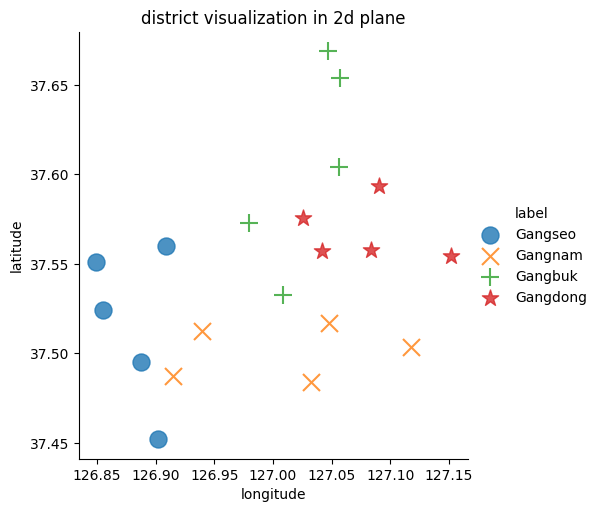

In [28]:
#데이터 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='longitude', y='latitude', data=train_df, fit_reg=False, #x와 y=표기
           scatter_kws={"s": 150},
           markers=["o", "x","+","*"],
           hue="label")

plt.title('district visualization in 2d plane')

In [29]:
#데이터 다듬기(행정구역명이 필요없으니 삭제)
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

#위도와 경도가 x, 지역명이 y
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

***모델 학습***

In [34]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder() #카테고리 데이터->숫자 변환
y_encoded = le.fit_transform(y_train)
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
#시각화
def display_decision_surface(clf, X, y):
  x_min = X.longitude.min() -0.01
  x_max = X.longitude.max() +0.01
  y_min = X.latitude.min() -0.01
  y_max = X.latitude.max() + 0.01

  n_classes = len(le.classes_)
  plot_colors = "rywb"
  plot_step = 0.001

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)[0]
    plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
                c=color, label=le.classes_[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=200)

  plt.title("Decision surface of a decision tree", fontsize=16)
  plt.legend(bbox_to_anchor=(1.05, 1),
             loc = 2, borderaxespad=0, fontsize=14)

  plt.xlabel('longitude', fontsize=16)
  plt.ylabel('latitude', fontsize=16)

  plt.rcParams["figure.figsize"] = [7,5]
  plt.rcParams["font.size"] = 14
  plt.rcParams["xtick.labelsize"] = 14
  plt.rcParams["ytick.labelsize"] = 14
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-33-46e22472bf49>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-33-46e22472bf49>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-33-46e22472bf49>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-33-46e22472bf49>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,


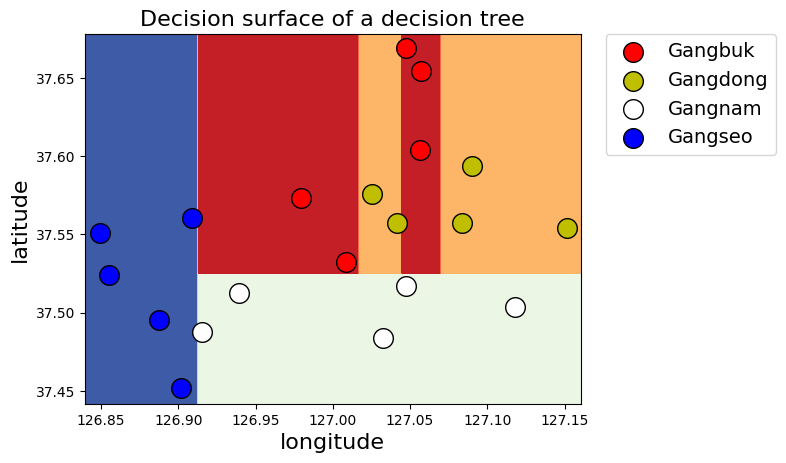

In [35]:
display_decision_surface(clf, X_train, y_encoded)

해당 코드는 과대적합됨.
강북 사이에 강동 해당 데이터가 포함됐다.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-33-46e22472bf49>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-33-46e22472bf49>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-33-46e22472bf49>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-33-46e22472bf49>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,


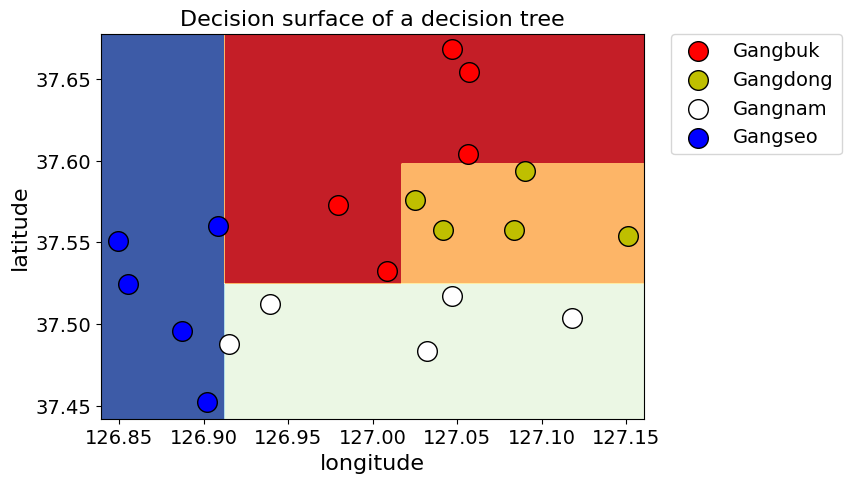

In [38]:
from datetime import MINYEAR
#수정안

clf = tree.DecisionTreeClassifier(max_depth=4,
                                    min_samples_split=2,
                                    min_samples_leaf=2,
                                    random_state=70).fit(X_train, y_encoded.ravel())

display_decision_surface(clf, X_train, y_encoded)